In [91]:
#!pip install scikit-plot
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


In [92]:
df = pd.read_csv("songs_df.csv")


In [93]:
df.columns


Index(['name', 'artist', 'popularity', 'id', 'label', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [94]:
features = ['popularity', 'danceability', 'energy', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence',  'duration_ms']
target = "label"


In [95]:
X = subset[features]


In [96]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
#label_encoder = LabelEncoder()


In [97]:
kmeans = KMeans(n_clusters=6,random_state=12345)


In [98]:
kmeans.fit(scaled_X)

KMeans(n_clusters=6, random_state=12345)

In [99]:
cluster_label = kmeans.predict(scaled_X)

In [100]:
df["cluster_label"] = cluster_label


In [101]:
df.groupby("cluster_label").mean()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster_label,,,,,,,,,,,,,,
0,50.717842,0.522465,0.264193,4.659751,-13.558282,0.597510,0.042997,0.790475,0.056708,0.150100,0.391086,110.243120,293833.211618,3.867220
1,66.475248,0.657917,0.740584,5.514851,-5.722578,0.000000,0.074181,0.143055,0.016519,0.187874,0.555233,121.588937,218865.171617,3.983498
2,65.242718,0.619056,0.744146,4.626214,-5.931131,1.000000,0.061902,0.118616,0.018459,0.163134,0.569981,121.808505,226033.123786,3.990291
3,38.211111,0.467117,0.199768,5.272222,-17.877378,0.455556,0.041072,0.881533,0.800422,0.137892,0.279569,110.054167,311388.477778,3.788889
4,27.782609,0.383757,0.877284,4.968116,-6.246806,0.475362,0.088209,0.026093,0.105706,0.227205,0.349427,130.812455,309218.304348,3.950725
5,67.452489,0.749421,0.621760,4.995475,-7.053928,0.524887,0.313986,0.228325,0.000968,0.166994,0.572154,128.007584,185813.380090,3.936652


In [102]:
df.loc[df["cluster_label"] == 3]["label"].value_counts()

jazz    180
Name: label, dtype: int64

In [103]:
inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_X)
    inertias.append(kmeans.inertia_)
    print(f"k={k}, inertia={kmeans.inertia_}")

k=1, inertia=18722.000000000033
k=2, inertia=14079.530411036128
k=3, inertia=12035.342995879204
k=4, inertia=10939.23931046431
k=5, inertia=10056.109044323735
k=6, inertia=9399.05224126836
k=7, inertia=8849.685066576634
k=8, inertia=8347.478617407083
k=9, inertia=7924.344880679129
k=10, inertia=7689.431582011043


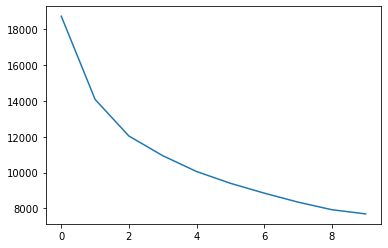

In [104]:
# regra do cotovelo - pegaremos 3 clusters 
plt.plot(inertias)

In [106]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_X)
labels = kmeans.labels_
df["cluster_labels"] = labels

In [108]:
df.groupby("cluster_label").mean()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_labels
cluster_label,,,,,,,,,,,,,,,
0,50.717842,0.522465,0.264193,4.659751,-13.558282,0.597510,0.042997,0.790475,0.056708,0.150100,0.391086,110.243120,293833.211618,3.867220,4.775934
1,66.475248,0.657917,0.740584,5.514851,-5.722578,0.000000,0.074181,0.143055,0.016519,0.187874,0.555233,121.588937,218865.171617,3.983498,2.663366
2,65.242718,0.619056,0.744146,4.626214,-5.931131,1.000000,0.061902,0.118616,0.018459,0.163134,0.569981,121.808505,226033.123786,3.990291,6.004854
3,38.211111,0.467117,0.199768,5.272222,-17.877378,0.455556,0.041072,0.881533,0.800422,0.137892,0.279569,110.054167,311388.477778,3.788889,2.755556
4,27.782609,0.383757,0.877284,4.968116,-6.246806,0.475362,0.088209,0.026093,0.105706,0.227205,0.349427,130.812455,309218.304348,3.950725,5.043478
5,67.452489,0.749421,0.621760,4.995475,-7.053928,0.524887,0.313986,0.228325,0.000968,0.166994,0.572154,128.007584,185813.380090,3.936652,6.809955


In [113]:
df.loc[df["cluster_label"]==2, "label"].value_counts()

pop      256
metal    104
rap       41
jazz      11
Name: label, dtype: int64